In [1]:
"""
Created on Tue Nov 28 20:28:42 2020

@author: Armando Alvarez Rolins

Title: Housing Prices Predictive Analysis

Description: Predict sales price for housing based on market data
"""
# Linear Algebra and Data Processing
import numpy as np
import pandas as pd
import requests
import os
import datetime
import sklearn as sk
# Modeling
from sklearn.model_selection import (GridSearchCV)
# Random
import random
# Plotting
import matplotlib.pyplot as plt

# Data Extraction

In [2]:
# Data Extraction
df_house_test = pd.read_csv("./test.csv")
df_house_train = pd.read_csv("./train.csv")

print(df_house_test.info())
print("\n")
print(df_house_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

A brief look at the test and train data confirms they have the same number of features with the additional "SalePrice" which is the dependent variable we are going to predict on the test data set

Text(0.5, 1.0, 'Percentage of Empty Values per Feature')

<Figure size 432x288 with 0 Axes>

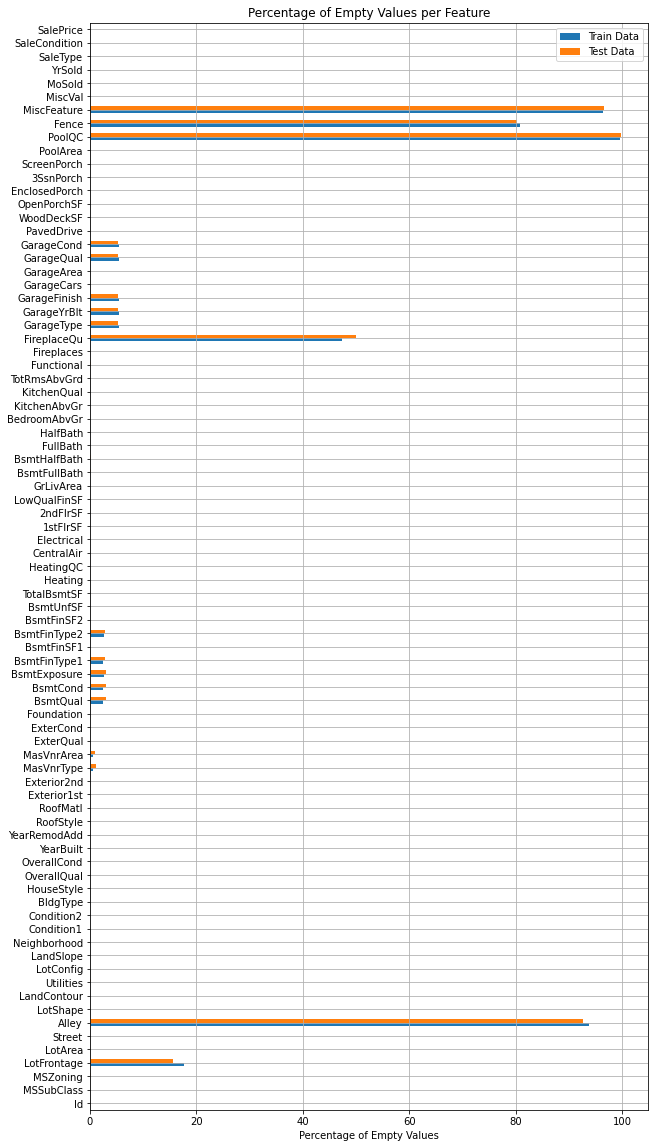

In [41]:
# Defining features
features = pd.concat([df_house_train.drop(['Id', 'SalePrice'], axis=1), df_house_test.drop(['Id'], axis=1)])

# Transform MSSubClass into string because numbers correspond to code, not a continuous scale
features['MSSubClass'] = features['MSSubClass'].apply(str)

# Check number of Na in the dataframe
empty_values = df_house_train.isna().sum().head(81).apply(lambda x: x*100/len(df_house_train.index))
empty_values = pd.concat([empty_values, df_house_test.isna().sum().head(81).apply(lambda x: x*100/len(df_house_test.index))], \
                         axis=1)
empty_values.columns=['Train Data', 'Test Data']

# Plot Figure
plt.figure()
empty_values.plot.barh(figsize=(10,20), grid=1)
plt.xlabel('Percentage of Empty Values')
plt.title('Percentage of Empty Values per Feature')

In [4]:
# Separating feature types
time_features = [feature for feature in features.columns if 'Yr' in feature or 'Year' in feature \
                 or 'Mo' in feature or 'Month' in feature or 'Dy' in feature or 'Day' in feature]
cat_features = features.select_dtypes(include=['object']).columns.tolist()
num_features = features.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(time_features,'\n')
print(cat_features,'\n')
print(num_features,'\n')

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold'] 

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'] 

['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrB

# Feature Engineering